In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df_train=pd.read_csv("train.csv")
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
df_train["SalePrice"].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [4]:
# We notice here that the minimum price is larger than zero

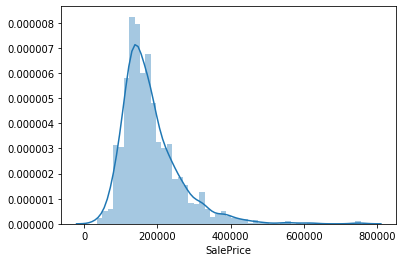

In [5]:
sns.distplot(df_train["SalePrice"])

In [6]:
# we learin from this histogram that this data is deviated from the normal distribution with a positive skew
# and also it has apeak

In [7]:
# lets check skewness and kurtosis(flatness)
print(f"Skewness is {df_train['SalePrice'].skew()}")
print(f"kurtosis is {df_train['SalePrice'].kurt()}")      

Skewness is 1.8828757597682129
kurtosis is 6.536281860064529


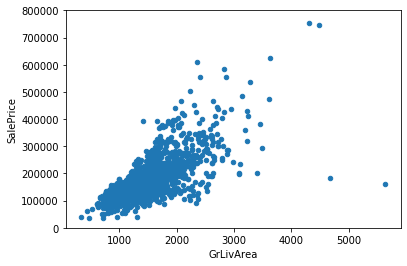

In [8]:
# let us check relation with other variables
# checking GrLiveArea (above ground area)

data = pd.concat([df_train["SalePrice"],df_train["GrLivArea"]] , axis= 1)
data.plot.scatter(x="GrLivArea" , y="SalePrice",ylim=(0,800000) )

In [9]:
# it looks like a linear relation

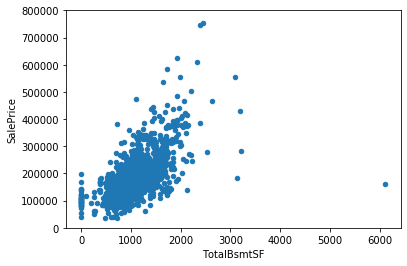

In [10]:
# chcking TotalBsmtSF  (basment area)
data = pd.concat([df_train["SalePrice"],df_train["TotalBsmtSF"]] , axis= 1)
data.plot.scatter(x="TotalBsmtSF" , y="SalePrice",ylim=(0,800000) )

In [11]:
# looks like stron liear relation or an exponential one 
#also sometimes it is giving zero outputs. 

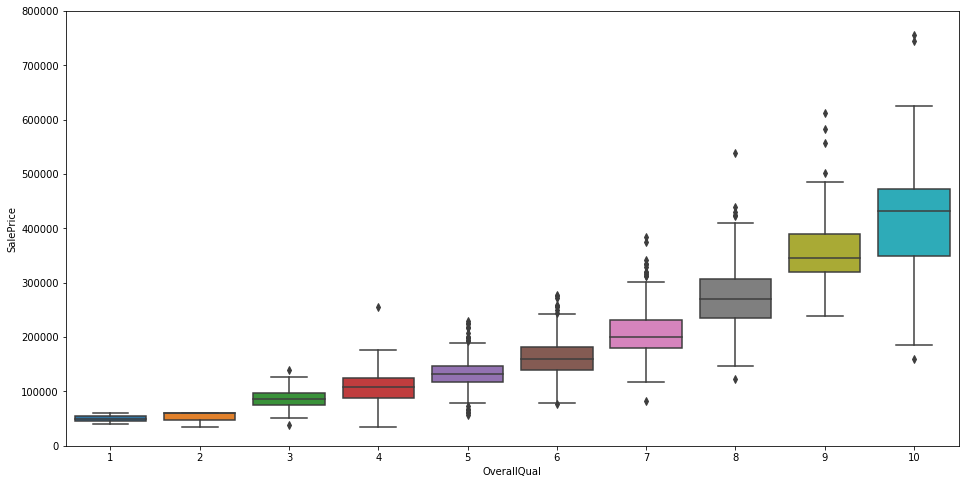

In [12]:
# now lets check with categorical data 
# checking OverallQual  (overall quility and finishing material )
data = pd.concat([df_train["SalePrice"],df_train["OverallQual"]],axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x="OverallQual" , y="SalePrice" , data= data)
fig.axis(ymin=0, ymax=800000);

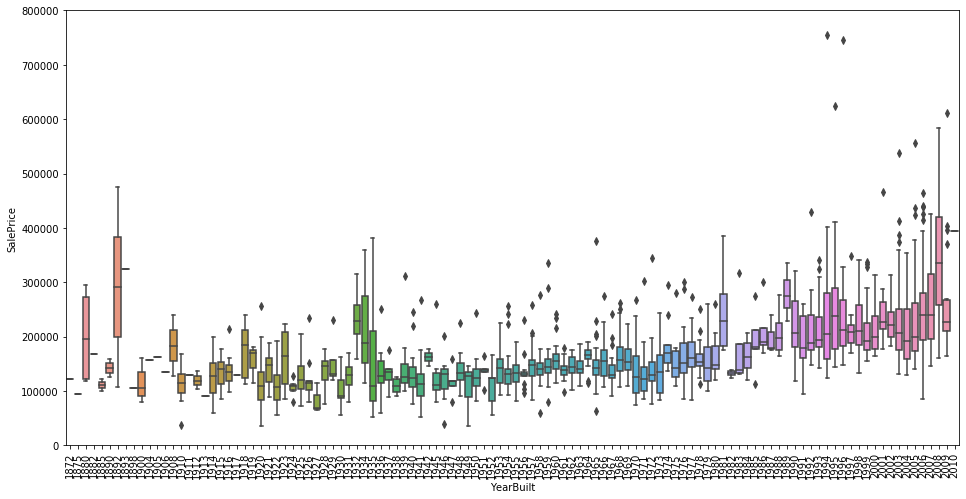

In [13]:
# checking YearBuilt  
data = pd.concat([df_train["SalePrice"],df_train["YearBuilt"]],axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x="YearBuilt" , y="SalePrice" , data= data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [14]:
# conclusion :
# 'GrLivArea' and 'TotalBsmtSF' have positive linear relation with 'SalePrice'
# 'OverallQual' and 'YearBuilt' have realation with 'SalePrice' and it is stronger in case of 'OveralQual' 

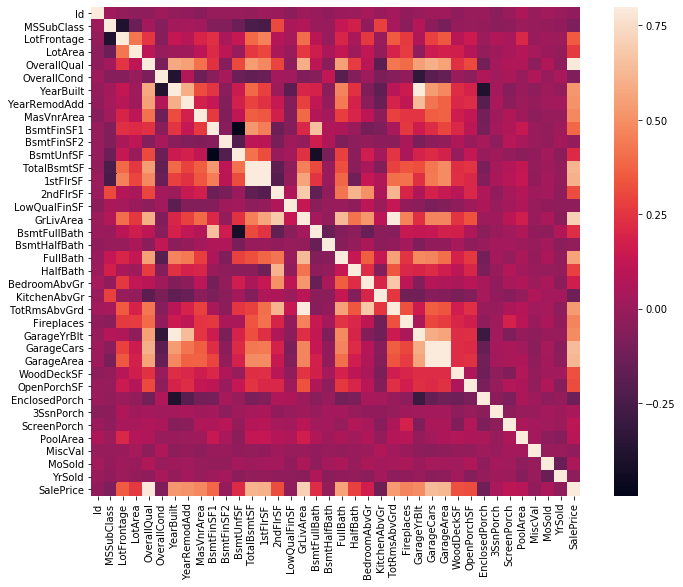

In [15]:
# Now in order to select features we can get help using the correlation matrix (heatmap)
corrmat = df_train.corr()
f,ax= plt.subplots(figsize=(12,9))
sns.heatmap(corrmat , vmax=0.8  ,square= True)

In [16]:
# the white squares inicates very high correlation so these columns consider as they give the same information. 
# it look like that the chosen columns before have a good colleration values but still there another columns should be considered. 


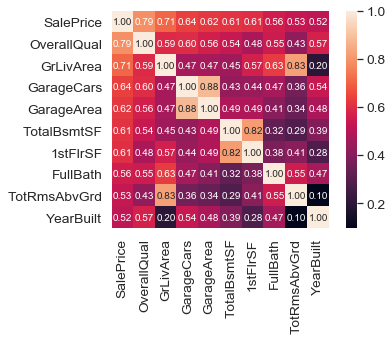

In [17]:
# lets check with zoomed in heatmap 

k= 10 # number of variables
cols = corrmat.nlargest(k, 'SalePrice')["SalePrice"].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm , cbar= True , annot= True , square= True , fmt=".2f" ,annot_kws={'size':10} , yticklabels=cols.values ,xticklabels=cols.values )


In [18]:
# GarageCars and Garage Area are similar info so we will keep GarageCars 
# TotalBsmtSF and 1stFlrSF are similar info we will keep TotalbsmtSF 
# all the other columns look like they are correlated with SalePrice so we will keep them. 


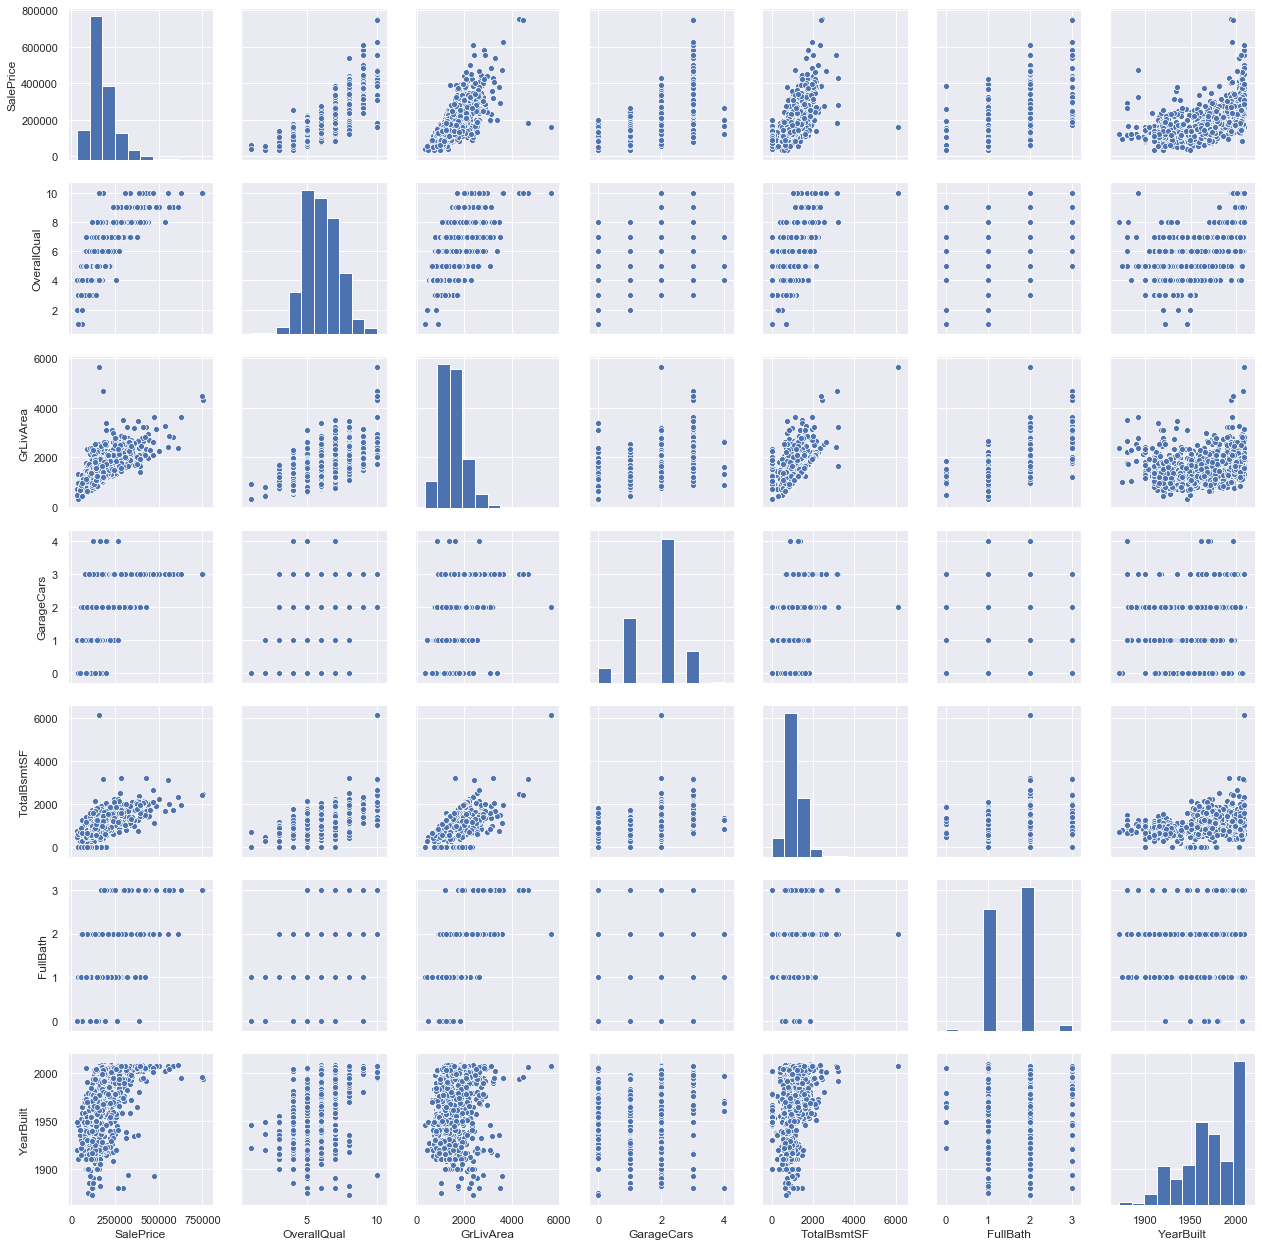

In [19]:
# Now we will check the corellated variables with SalePrice on a scatter plot 
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[cols])
plt.show()

In [20]:
# now it is time to check missing data 


In [21]:
total=df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
datatype= df_train.dtypes
missingData= pd.concat([total,percent,datatype],axis=1,keys=['Total','Percent','Type'],sort=False)
missingData.head(20)


,Total,Percent,Type
PoolQC,1453,0.995205,object
MiscFeature,1406,0.963014,object
Alley,1369,0.937671,object
Fence,1179,0.807534,object
FireplaceQu,690,0.472603,object
LotFrontage,259,0.177397,float64
GarageCond,81,0.055479,object
GarageType,81,0.055479,object
GarageYrBlt,81,0.055479,float64
GarageFinish,81,0.055479,object


In [22]:
# I will drop columns with missing data more than 60%
droppingList= missingData[missingData.Percent>0.6].index
df_train.drop(droppingList,axis=1,inplace=True)
# at another time I want to try filling this categorical values with no string and test the results. 
# df_train['PoolQC'].fillna("no")
# df_train['Alley'].fillna("no") 
# df_train['Fence'].fillna("no") 


In [23]:
# filling categorical values
df_train['FireplaceQu'].fillna("no",inplace=True) 
df_train['GarageCond'].fillna("no",inplace=True) 
df_train['GarageType'].fillna("no",inplace=True)
df_train['GarageFinish'].fillna("no",inplace=True) 
df_train['GarageQual'].fillna("no",inplace=True) 
df_train['BsmtExposure'].fillna("no",inplace=True)
df_train['BsmtFinType2'].fillna("no",inplace=True)
df_train['BsmtFinType1'].fillna("no",inplace=True)
df_train['BsmtCond'].fillna("no",inplace=True)
df_train['BsmtQual'].fillna("no",inplace=True)
df_train['MasVnrType'].fillna("no",inplace=True)
df_train['Electrical'].fillna("no",inplace=True)


In [24]:
# Filling numerical values
df_train['LotFrontage'].fillna(df_train['LotFrontage'].median(),inplace=True)
df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].median(),inplace=True)
df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].median(),inplace=True)


In [25]:
#df_train.describe(include = ['O']).transpose().index
#df_train.describe().transpose().index

In [26]:
from sklearn.preprocessing import StandardScaler

saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print("Low range vals: ","\n" ,low_range)
print("Low range vals: ","\n" ,high_range)

Low range vals:  
 [[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]
Low range vals:  
 [[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


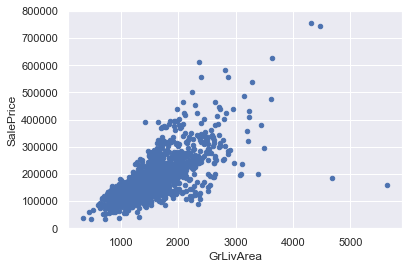

In [27]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [28]:
#deleting points
df_train.sort_values(by = 'GrLivArea' ,ascending= False)[:2].index
df_train.drop(df_train[df_train["Id"]==1299].index,inplace=True)
df_train.drop(df_train[df_train["Id"]==524].index,inplace=True)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


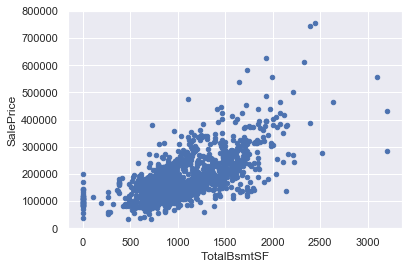

In [29]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

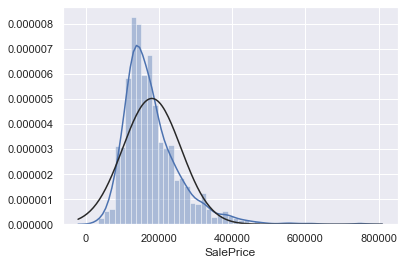

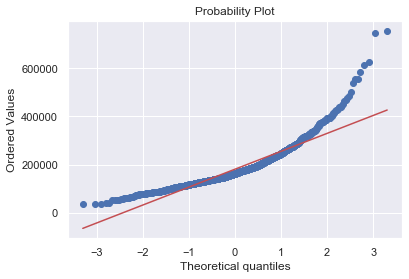

In [30]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [31]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

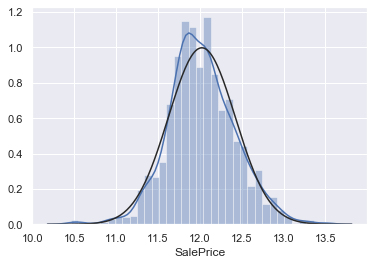

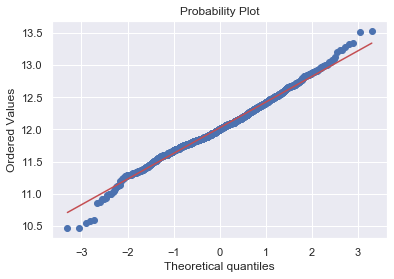

In [32]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

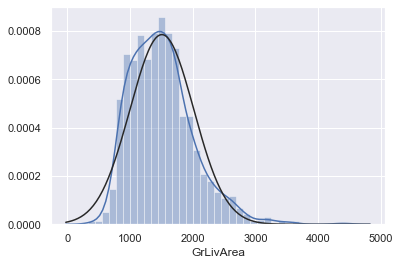

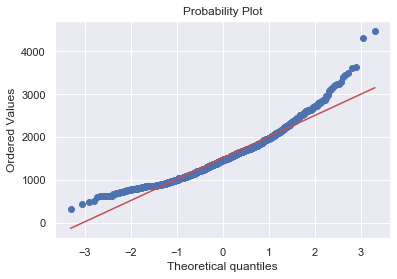

In [33]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [34]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

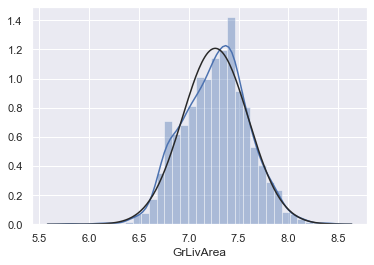

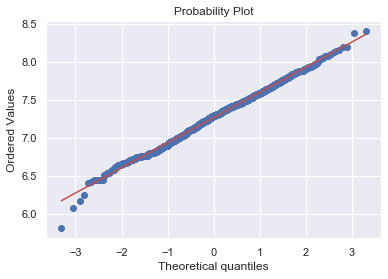

In [35]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

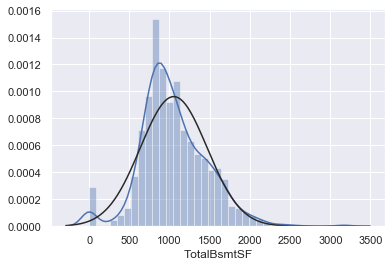

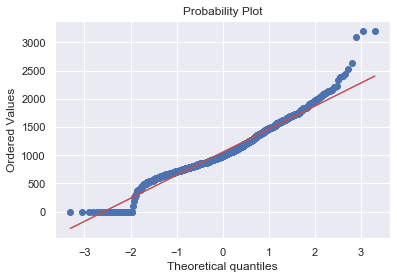

In [36]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)